<a href="https://colab.research.google.com/github/Andriow/DeliveryOptimizer/blob/main/ClusterFrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-cp37-none-any.whl size=8603 sha256=b9783c9d0eb5d0f9aa4829de6b29422b620f657d2739306550f674e41ba00d60
  Stored in directory: /root/.cache/pip/wheels/de/a0/08/5234d6b02b29c561f62b6c985e2eb7d480fb0b92359a8c74e4
Successfully built minisom


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
## for data
import numpy as np
import pandas as pd
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for geospatial
import folium
import geopy
## for machine learning
from sklearn import preprocessing, cluster
import scipy
## for deep learning
import minisom

In [ ]:
path = "/content/gdrive/My Drive/ioMob/8 - SORTEIOS"

In [ ]:
!ls "/content/gdrive/My Drive/ioMob/8 - SORTEIOS"

Endereços.csv  IOMOB-SORTEIOS.ipynb  TESTE1.csv  TESTE1_luckynumber.csv


In [ ]:
f = "Endereços.csv"
df = pd.read_csv(f'{path}/{f}', sep=';', decimal=',', encoding= 'unicode_escape')

In [ ]:
df = df.rename(columns = {'Latitude (Optional)': 'latitude', 'Longitude (Optional)': 'longitude'}, inplace = False)

In [ ]:
city = "Curitiba"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)

Curitiba, Região Geográfica Imediata de Curitiba, Região Metropolitana de Curitiba, Região Geográfica Intermediária de Curitiba, Paraná, Região Sul, Brasil


In [ ]:
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

[lat, long]: [-25.4295963, -49.2712724]


In [ ]:
x, y = "latitude", "longitude"
color = "red"
size = 1
popup = "Name of Location (Optional)"
data = df.copy()

In [ ]:
map_ = folium.Map(location=location, tiles="cartodbpositron", zoom_start=11)

In [ ]:
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color="red", fill=True,
           radius=10).add_to(map_), axis=1)

0      <folium.vector_layers.CircleMarker object at 0...
1      <folium.vector_layers.CircleMarker object at 0...
2      <folium.vector_layers.CircleMarker object at 0...
3      <folium.vector_layers.CircleMarker object at 0...
4      <folium.vector_layers.CircleMarker object at 0...
                             ...                        
168    <folium.vector_layers.CircleMarker object at 0...
169    <folium.vector_layers.CircleMarker object at 0...
170    <folium.vector_layers.CircleMarker object at 0...
171    <folium.vector_layers.CircleMarker object at 0...
172    <folium.vector_layers.CircleMarker object at 0...
Length: 173, dtype: object

In [ ]:
map_

In [ ]:
X = df[["latitude","longitude"]]
map_shape = (4,5)

In [ ]:
## scale data
scaler = preprocessing.StandardScaler()
X_preprocessed = scaler.fit_transform(X.values)

In [ ]:
## clustering
model = minisom.MiniSom(x=map_shape[0], y=map_shape[1],
                        input_len=X.shape[1])
model.train_batch(X_preprocessed, num_iteration=100, verbose=False)

In [ ]:
## build output dataframe
dtf_X = X.copy()
dtf_X["cluster"] = np.ravel_multi_index(np.array(
      [model.winner(x) for x in X_preprocessed]).T, dims=map_shape)

In [ ]:
## add clustering info to the original dataset
df[["cluster"]] = dtf_X[["cluster"]]

In [ ]:
k = df["cluster"].nunique()

Text(0.5, 1.0, 'Clustering (k=20)')

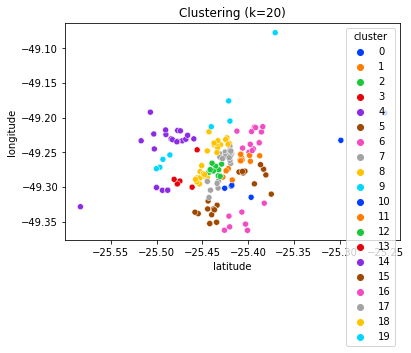

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(x="latitude", y="longitude", data=df,
                palette=sns.color_palette("bright",k),
                hue='cluster', size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')

In [ ]:
x, y = "latitude", "longitude"
color = "cluster"
size = 1
popup = "Name of Location (Optional)"
marker = "centroids"
data = df.copy()

In [ ]:
## create color column
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in range(k)]
data["color"] = data[color].apply(lambda x: lst_colors[x])

In [ ]:
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron", zoom_start=11)

In [ ]:
data.columns

Index(['Name of Location (Optional)', 'Address (Optional)',
       'Zip / Postal Code (Optional)', 'Country (Required)', 'latitude',
       'longitude', 'Weight (Optional)', 'Remarks (Optional)', 'cluster',
       'color'],
      dtype='object')

In [ ]:
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=10).add_to(map_), axis=1)

0      <folium.vector_layers.CircleMarker object at 0...
1      <folium.vector_layers.CircleMarker object at 0...
2      <folium.vector_layers.CircleMarker object at 0...
3      <folium.vector_layers.CircleMarker object at 0...
4      <folium.vector_layers.CircleMarker object at 0...
                             ...                        
168    <folium.vector_layers.CircleMarker object at 0...
169    <folium.vector_layers.CircleMarker object at 0...
170    <folium.vector_layers.CircleMarker object at 0...
171    <folium.vector_layers.CircleMarker object at 0...
172    <folium.vector_layers.CircleMarker object at 0...
Length: 173, dtype: object

In [ ]:
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in range(k):
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle
     fa-1x" style="color:"""+lst_colors[i]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

In [ ]:
map_